In [39]:
# import all necessary libraries
import torch
# print(torch.__version__)
from torchvision import models
from PIL import Image
from torchvision import transforms
import matplotlib.pyplot as plt

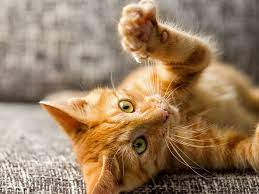

In [40]:
# load original image
img = Image.open("cat_images/cat1.jpg")
img # show image in jupiter notebook

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


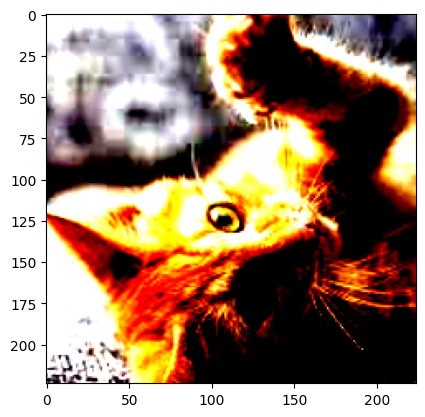

In [41]:
preprocess = transforms.Compose([
transforms.Resize(256),
transforms.CenterCrop(224),
transforms.ToTensor(),
transforms.Normalize(
mean=[0.485, 0.456, 0.406],
std=[0.229, 0.224, 0.225]
)])

img_t = preprocess(img)
img_t.shape
#plt.imshow(img_t)
plt.imshow(img_t.permute(1,2,0))


In [42]:
resnet = models.resnet101(pretrained=True)
alexnet = models.alexnet(pretrained=True)
batch_t= torch.unsqueeze(img_t, 0)

c:\Users\tvogt\AppData\Local\Programs\Python\Python39\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\tvogt\AppData\Local\Programs\Python\Python39\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet101_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet101_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
c:\Users\tvogt\AppData\Local\Programs\Python\Python39\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IM

In [43]:
# classification with ResNet
resnet.eval()
out = resnet(batch_t)
with open('imagenet_classes.txt') as f:
    labels = [line.strip() for line in f.readlines()]
_, index = torch.max(out, 1)
percentage = torch.nn.functional.softmax(out, dim=1)[0] * 100
# give the best possible outcome
labels[index[0]], percentage[index[0]].item()
# give all possible outcomes
_, indices = torch.sort(out, descending=True)
[(labels[idx], percentage[idx].item()) for idx in indices[0][:5]]



[('tiger cat', 50.530517578125),
 ('tabby, tabby cat', 35.50457763671875),
 ('Egyptian cat', 5.94706916809082),
 ('lion, king of beasts, Panthera leo', 1.5697224140167236),
 ('Persian cat', 1.371952772140503)]

In [44]:
# classification with AlexNet
alexnet.eval()
out = alexnet(batch_t)
with open('imagenet_classes.txt') as f:
    labels = [line.strip() for line in f.readlines()]
_, index = torch.max(out, 1)
percentage = torch.nn.functional.softmax(out, dim=1)[0] * 100
# give the best possible outcome
labels[index[0]], percentage[index[0]].item()
# give all possible outcomes
_, indices = torch.sort(out, descending=True)
[(labels[idx], percentage[idx].item()) for idx in indices[0][:5]]

[('langur', 27.081928253173828),
 ('tabby, tabby cat', 15.245633125305176),
 ('fox squirrel, eastern fox squirrel, Sciurus niger', 8.877336502075195),
 ('tiger cat', 8.042738914489746),
 ('Egyptian cat', 7.52042293548584)]